In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 모델링 및 평가 라이브러리
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
import matplotlib.font_manager as fm
from sklearn.model_selection import GridSearchCV


# 시각화 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns

# Find the font path for NanumGothic
font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])
for fpath in font_files:
    fm.fontManager.addfont(fpath)

# Set the font to NanumGothic
plt.rc('font', family='NanumGothic')
plt.rc('axes', unicode_minus=False) # Allow negative signs to be displayed correctly

print("Korean font installed and configured.")

Korean font installed and configured.


In [14]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows
# plt.rcParams['font.family'] = 'AppleGothic'  # Mac
# plt.rcParams['font.family'] = 'NanumGothic'  # Linux or Colab

# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

print("✅ 한글 폰트 설정 완료")

✅ 한글 폰트 설정 완료


In [3]:
# 데이터 불러오기
df_7 = pd.read_csv('/content/drive/MyDrive/유통경진대회/A_out_7_final.csv')
df_1 = pd.read_csv('/content/drive/MyDrive/유통경진대회/A_out_1_final.csv')
display(df_7.shape, df_1.shape)

/tmp/ipython-input-520836293.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_7 = pd.read_csv('/content/drive/MyDrive/유통경진대회/A_out_7_final.csv')


(221701, 87)

(32709, 85)

In [27]:
models = {
    'Random Forest': RandomForestRegressor(
        n_estimators=200,  # 100 → 200
        max_depth=15,
        min_samples_split=10,
        min_samples_leaf=5,
        random_state=42,
        n_jobs=-1
    ),
    'XGBoost': XGBRegressor(
        n_estimators=1000,  # early stopping으로 자동 중단
        max_depth=7,
        learning_rate=0.05,  # 0.1 → 0.05
        random_state=42,
        n_jobs=-1,
        early_stopping_rounds=50  # 50번 개선 없으면 중단
    ),
    'LightGBM': LGBMRegressor(
        n_estimators=1000,  # early stopping
        max_depth=7,
        learning_rate=0.05,
        random_state=42,
        n_jobs=-1,
        verbose=-1,
        early_stopping_rounds=50
        )
}

## 7

In [5]:
df_7.dtypes

,0
Unnamed: 0,int64
판매일,object
판매수량,int64
is_holiday,int64
holiday_name,object
...,...
dow_1,bool
dow_2,bool
dow_3,bool
dow_4,bool


In [7]:
# --- 1. Feature Selection ---
df_7.dtypes[df_7.dtypes == 'object']

,0
판매일,object
holiday_name,object


In [8]:
df_7.drop('holiday_name', axis=1, inplace=True)
df_7.dtypes[df_7.dtypes == 'object']

,0
판매일,object


In [10]:
df_7 = df_7.drop('Unnamed: 0', axis=1) # 저장할 때 index 안 지우고 했네

In [18]:
df_7 = df_7.drop('7_outlier', axis=1) # 이것도 깜박

In [19]:
df_7.columns

Index(['판매일', '판매수량', 'is_holiday', 'is_long_holiday', 'days_to_holiday',
       'days_from_holiday', 'is_day_before_holiday', 'is_day_after_holiday',
       'is_lunar_new_year', 'is_chuseok', 'is_childrens_day',
       'is_memorial_day', 'is_summer_vacation', 'is_year_end_season', '요일',
       '평균기온(℃)', '최저기온(℃)', '최고기온(℃)', '국제유가', '소비자물가지수', '소비자심리지수', '월',
       'month_sin', 'month_cos', 'day_of_week', 'day_of_year', 'week_of_year',
       'day_of_month', 'quarter', 'is_weekend', 'is_month_start',
       'is_month_end', '년도', 'weekend_count_in_month', 'day_sin', 'day_cos',
       'dow_sin', 'dow_cos', 'sales_lag_1d', 'sales_lag_7d', 'sales_lag_14d',
       'sales_lag_30d', 'sales_lag_60d', 'sales_lag_90d', 'sales_lag_365d',
       'sales_lag_7d_same_dow', 'sales_lag_12m', 'sales_rolling_mean_7d',
       'sales_rolling_std_7d', 'sales_rolling_max_7d', 'sales_rolling_min_7d',
       'sales_rolling_mean_14d', 'sales_rolling_std_14d',
       'sales_rolling_max_14d', 'sales_rolling_mi

In [22]:
dropcol = ['category_dow_mean',

'category_month_mean',

'dow_mean',

'month_mean',

'sales_vs_overall_mean',

'sales_growth_1d',

'sales_growth_wow',

'sales_growth_mom',

'sales_growth_yoy']

df_7.drop(columns = dropcol, inplace=True)

In [24]:
df_7.columns

Index(['판매일', '판매수량', 'is_holiday', 'is_long_holiday', 'days_to_holiday',
       'days_from_holiday', 'is_day_before_holiday', 'is_day_after_holiday',
       'is_lunar_new_year', 'is_chuseok', 'is_childrens_day',
       'is_memorial_day', 'is_summer_vacation', 'is_year_end_season', '요일',
       '평균기온(℃)', '최저기온(℃)', '최고기온(℃)', '국제유가', '소비자물가지수', '소비자심리지수', '월',
       'month_sin', 'month_cos', 'day_of_week', 'day_of_year', 'week_of_year',
       'day_of_month', 'quarter', 'is_weekend', 'is_month_start',
       'is_month_end', '년도', 'weekend_count_in_month', 'day_sin', 'day_cos',
       'dow_sin', 'dow_cos', 'sales_lag_1d', 'sales_lag_7d', 'sales_lag_14d',
       'sales_lag_30d', 'sales_lag_60d', 'sales_lag_90d', 'sales_lag_365d',
       'sales_lag_7d_same_dow', 'sales_lag_12m', 'sales_rolling_mean_7d',
       'sales_rolling_std_7d', 'sales_rolling_max_7d', 'sales_rolling_min_7d',
       'sales_rolling_mean_14d', 'sales_rolling_std_14d',
       'sales_rolling_max_14d', 'sales_rolling_mi

In [25]:
# --- 2. 데이터 준비 ---
TARGET_CATEGORY = 7
TARGET = '판매수량'

# 제외할 컬럼 명시
exclude_cols = [
    '판매일',          # 또는 'date' (실제 컬럼명 확인)
    TARGET,            # 타겟
    '년도', '월',  # 이미 date에 포함
]

# Feature 선택
features = [col for col in df_7.columns if col not in exclude_cols]

print(f"사용할 Feature 개수: {len(features)}개")
print(f"Features: {features[:10]}...")  # 처음 10개만 출력


# --- 3. 훈련/검증 데이터 분리 ---
# NaN 제거 (Lag feature 때문에 생긴 것들)
# 최소한 365일 lag 때문에 2021년 1년치는 NaN
df_clean = df_7.dropna(subset=[col for col in features if 'lag' in col.lower()])

print(f"NaN 제거 전: {len(df_7)}개")
print(f"NaN 제거 후: {len(df_clean)}개")

# 시계열 분할 (2022~2023년 -> 훈련, 2024년 -> 검증)
# ※ 2021년은 lag feature NaN 때문에 대부분 제거됨
date_col = '판매일' if '판매일' in df_clean.columns else 'date'

train_df = df_clean[df_clean[date_col] < '2024-01-01']
val_df = df_clean[df_clean[date_col] >= '2024-01-01']

X_train = train_df[features]
y_train = train_df[TARGET]

X_val = val_df[features]
y_val = val_df[TARGET]

print(f"\n✅ 데이터 분리 완료:")
print(f"   훈련 데이터: {len(X_train)}개 ({train_df[date_col].min()} ~ {train_df[date_col].max()})")
print(f"   검증 데이터: {len(X_val)}개 ({val_df[date_col].min()} ~ {val_df[date_col].max()})")

# NaN 체크
print(f"\n   훈련 데이터 NaN: {X_train.isna().sum().sum()}개")
print(f"   검증 데이터 NaN: {X_val.isna().sum().sum()}개")

사용할 Feature 개수: 71개
Features: ['is_holiday', 'is_long_holiday', 'days_to_holiday', 'days_from_holiday', 'is_day_before_holiday', 'is_day_after_holiday', 'is_lunar_new_year', 'is_chuseok', 'is_childrens_day', 'is_memorial_day']...
NaN 제거 전: 221701개
NaN 제거 후: 221332개

✅ 데이터 분리 완료:
   훈련 데이터: 193412개 (2021-01-05 ~ 2023-12-29)
   검증 데이터: 27920개 (2024-01-02 ~ 2024-06-27)

   훈련 데이터 NaN: 0개
   검증 데이터 NaN: 0개



🔄 Random Forest 모델 학습 중...

   📊 훈련 데이터 성능:
      RMSE: 11.09
      MAE: 1.74
      R²: 0.7902

   📊 검증 데이터 성능:
      RMSE: 5.74
      MAE: 2.32
      MAPE: 60.03%
      R²: 0.9007
      Adj. R²: 0.9005

   ✅ 과적합 없음 (Train R² - Val R² = -0.1105)

🔄 XGBoost 모델 학습 중...
[0]	validation_0-rmse:17.44762
[1]	validation_0-rmse:16.72976
[2]	validation_0-rmse:16.08907
[3]	validation_0-rmse:15.52119
[4]	validation_0-rmse:14.96303
[5]	validation_0-rmse:14.46167
[6]	validation_0-rmse:13.98737
[7]	validation_0-rmse:13.55798
[8]	validation_0-rmse:13.16048
[9]	validation_0-rmse:12.75491
[10]	validation_0-rmse:12.39523
[11]	validation_0-rmse:12.05842
[12]	validation_0-rmse:11.75654
[13]	validation_0-rmse:11.46235
[14]	validation_0-rmse:11.21455
[15]	validation_0-rmse:10.99753
[16]	validation_0-rmse:10.77932
[17]	validation_0-rmse:10.58320
[18]	validation_0-rmse:10.40583
[19]	validation_0-rmse:10.24488
[20]	validation_0-rmse:10.10515
[21]	validation_0-rmse:9.97899
[22]	validation_0-rmse:9.85674
[23]	va

/tmp/ipython-input-2821069634.py:156: UserWarning: Glyph 45230 (\N{HANGUL SYLLABLE NAJ}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2821069634.py:156: UserWarning: Glyph 51012 (\N{HANGUL SYLLABLE EUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2821069634.py:156: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2821069634.py:156: UserWarning: Glyph 47197 (\N{HANGUL SYLLABLE ROG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2821069634.py:156: UserWarning: Glyph 51339 (\N{HANGUL SYLLABLE JOH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2821069634.py:156: UserWarning: Glyph 51020 (\N{HANGUL SYLLABLE EUM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()



   📊 훈련 데이터 성능:
      RMSE: 14.33
      MAE: 3.16
      R²: 0.6498

   📊 검증 데이터 성능:
      RMSE: 8.50
      MAE: 3.06
      MAPE: 82.18%
      R²: 0.7826
      Adj. R²: 0.7821

   ✅ 과적합 없음 (Train R² - Val R² = -0.1329)


📋 모델별 성능 비교

                 RMSE     MAE     MAPE      R²  Adj. R²
Random Forest  5.7413  2.3209  60.0273  0.9007   0.9005
LightGBM       8.4956  3.0586  82.1756  0.7826   0.7821
XGBoost        8.7897  3.1512  88.1938  0.7673   0.7667

🏆 최적 모델: Random Forest
   RMSE: 5.74
   R²: 0.9007


/tmp/ipython-input-2821069634.py:156: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2821069634.py:156: UserWarning: Glyph 44368 (\N{HANGUL SYLLABLE GYO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2821069634.py:156: UserWarning: Glyph 45458 (\N{HANGUL SYLLABLE NOP}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44368 (\N{HANGUL SYLLABLE GYO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45230 (\N{HANGUL SYLLABLE NAJ}) missing from font(s) DejaVu Sans.
  fig.canvas.pr

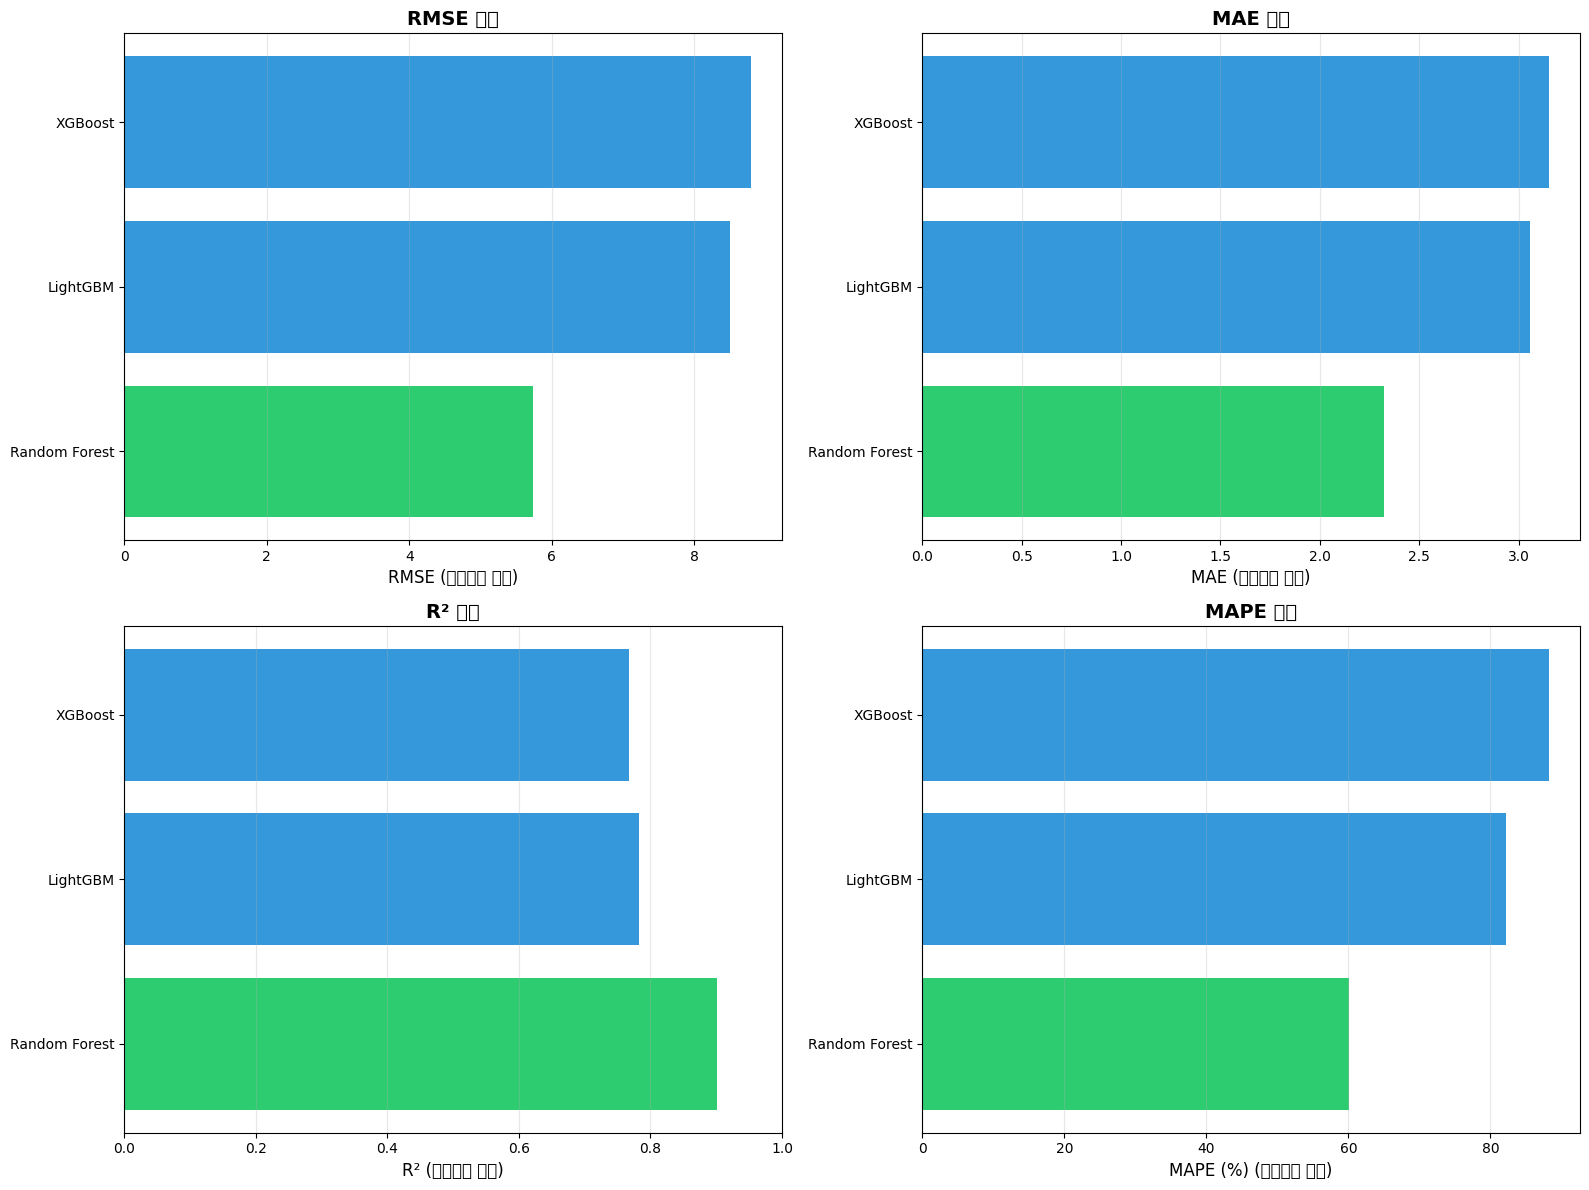

/tmp/ipython-input-2821069634.py:196: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2821069634.py:196: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2821069634.py:196: UserWarning: Glyph 54032 (\N{HANGUL SYLLABLE PAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2821069634.py:196: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2821069634.py:196: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2821069634.py:196: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2821069634.py:196: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from font(s) DejaVu Sans.
  plt.tight

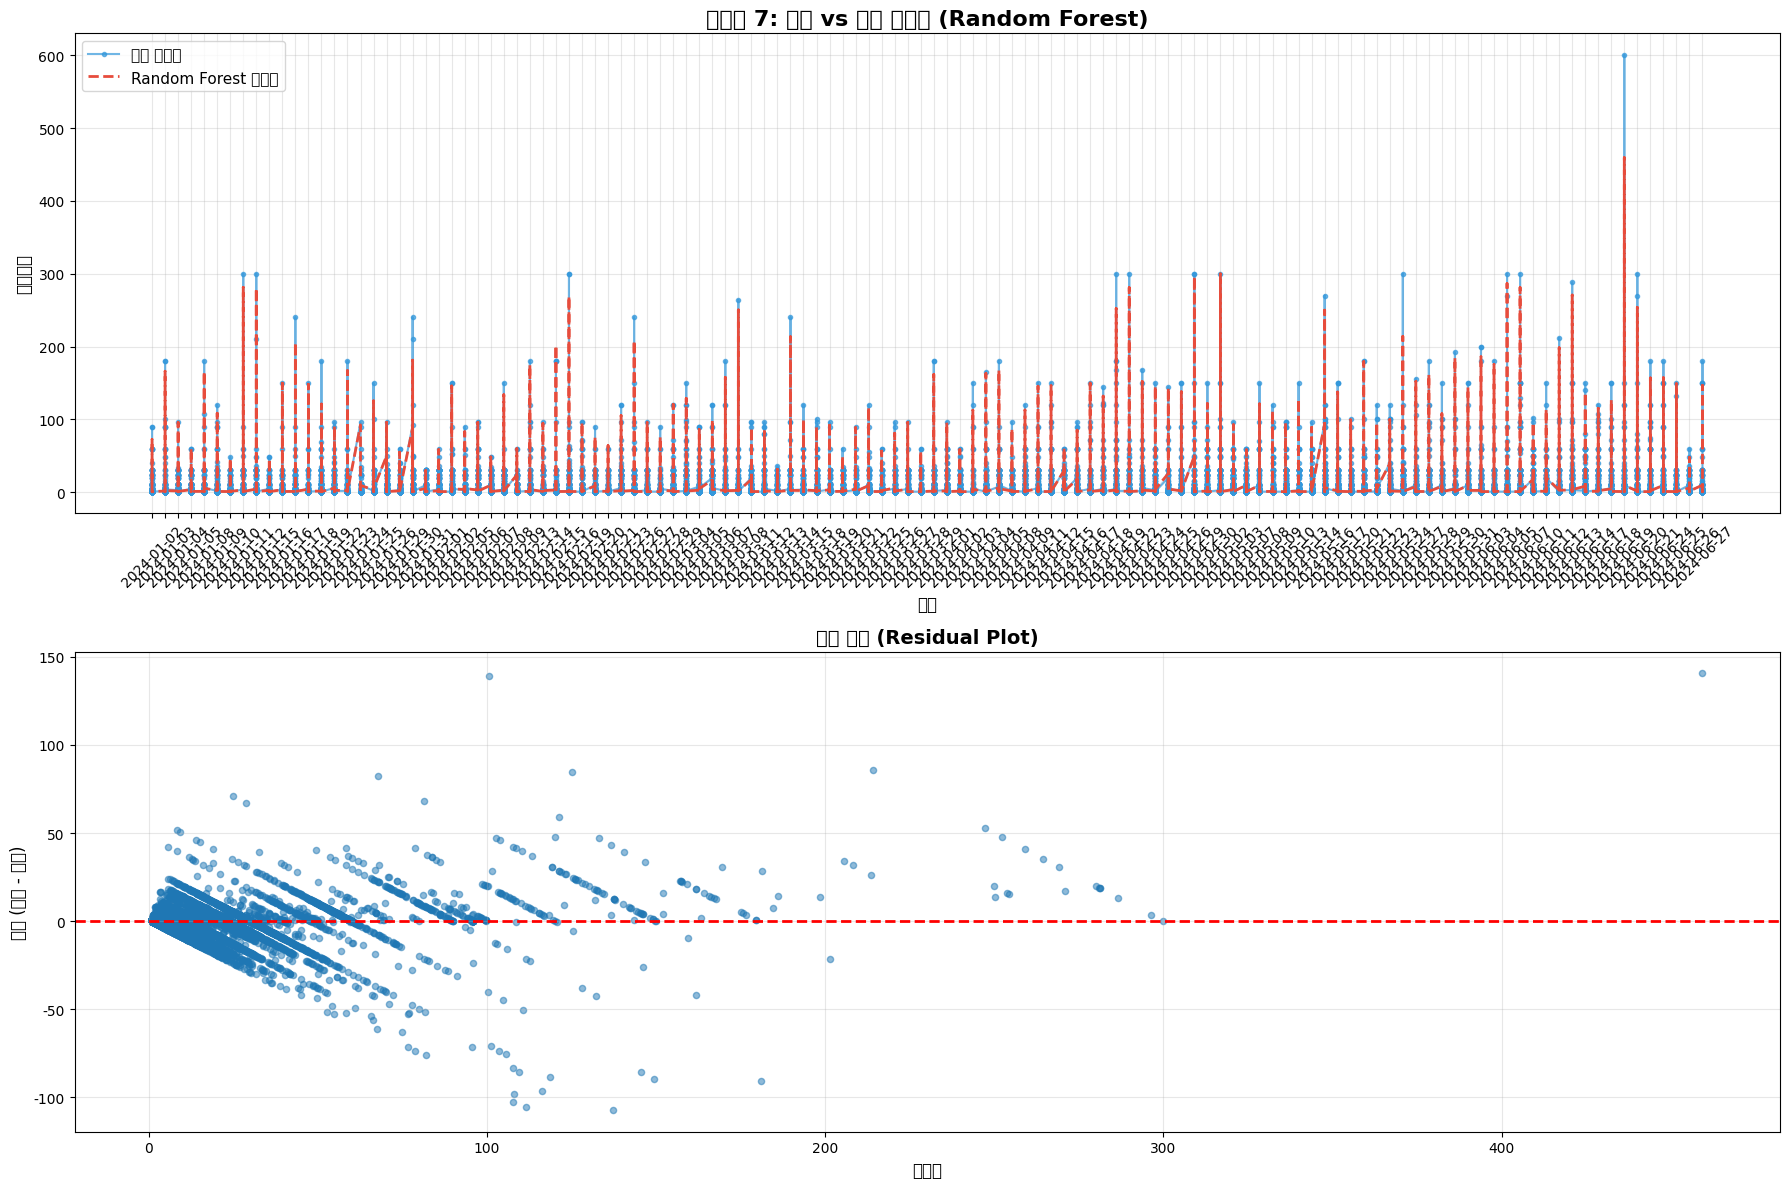



🔍 Random Forest 예측 오차 분석

📊 오차 통계:
   평균 오차: -0.41
   오차 표준편차: 5.73
   최대 과대예측: -107.19
   최대 과소예측: 140.61

📉 오차율 분포:
   평균 오차율: 60.03%
   중앙 오차율: 22.96%
   오차율 10% 이내: 8183일 (29.3%)
   오차율 20% 이내: 12844일 (46.0%)

⚠️  오차가 큰 날 Top 10:
        날짜  실제         예측          오차      오차율(%)
2024-06-19 600 459.394446  140.605554   23.434259
2024-01-30 240 100.589162  139.410838   58.087847
2024-01-12  30 137.192042 -107.192042  357.306687
2024-03-29   6 111.433157 -105.433157 1757.216347
2024-06-24   5 107.717567 -102.717567 2054.347238
2024-02-16  10 108.013505  -98.013505  980.134065
2024-01-03  20 116.324420  -96.324420  481.621860
2024-05-02  90 180.979751  -90.979751  101.088601
2024-02-16  60 149.466768  -89.466768  149.111254
2024-06-20  30 118.766340  -88.766340  295.887702


/tmp/ipython-input-2821069634.py:263: UserWarning: Glyph 50724 (\N{HANGUL SYLLABLE O}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2821069634.py:263: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2821069634.py:263: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2821069634.py:263: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2821069634.py:263: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2821069634.py:263: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2821069634.py:263: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from font(s) DejaVu Sans.
  plt.tight_layou

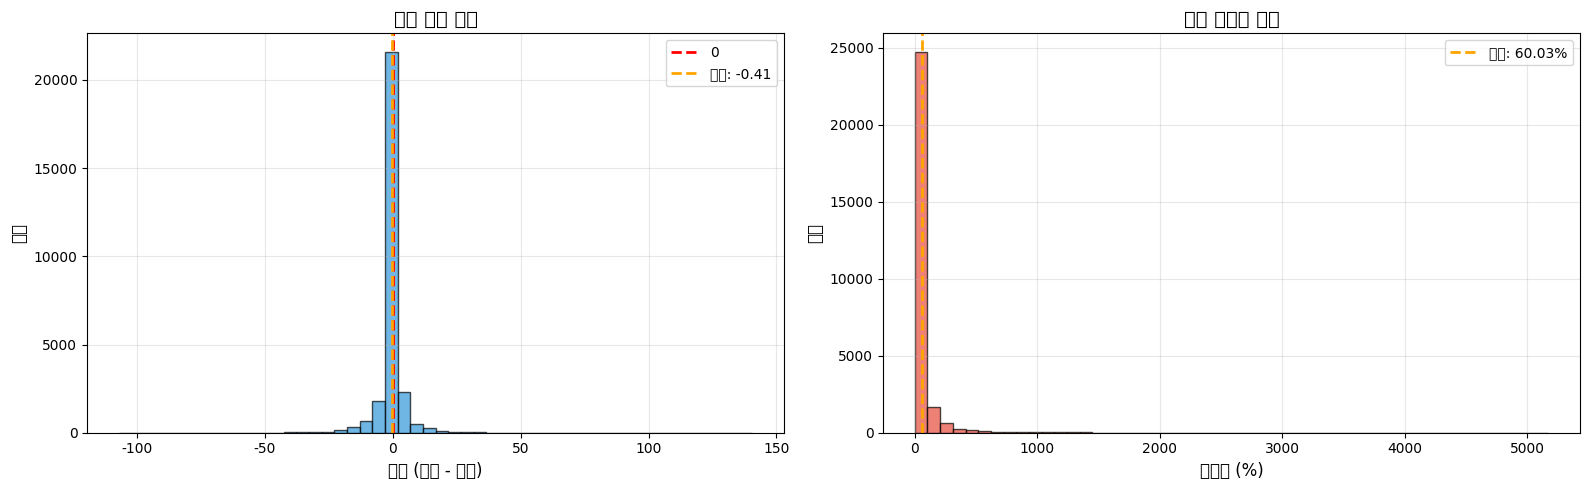



📊 Random Forest Feature Importance Top 20



               feature  importance
          sales_ewm_7d    0.643920
 sales_rolling_mean_7d    0.081238
          sales_lag_1d    0.069760
 sales_rolling_std_14d    0.035628
  sales_rolling_std_7d    0.034787
sales_rolling_mean_14d    0.030665
  sales_rolling_max_7d    0.017707
 sales_lag_7d_same_dow    0.013692
 sales_rolling_std_30d    0.008693
sales_rolling_mean_90d    0.006720
sales_rolling_mean_30d    0.006451
 sales_rolling_std_90d    0.005590
sales_rolling_mean_60d    0.005490
 sales_rolling_max_14d    0.004714
         sales_ewm_30d    0.004480
 sales_rolling_std_60d    0.003948
         sales_lag_30d    0.003527
 sales_rolling_max_60d    0.002516
 sales_rolling_max_90d    0.002292
          sales_lag_7d    0.002256


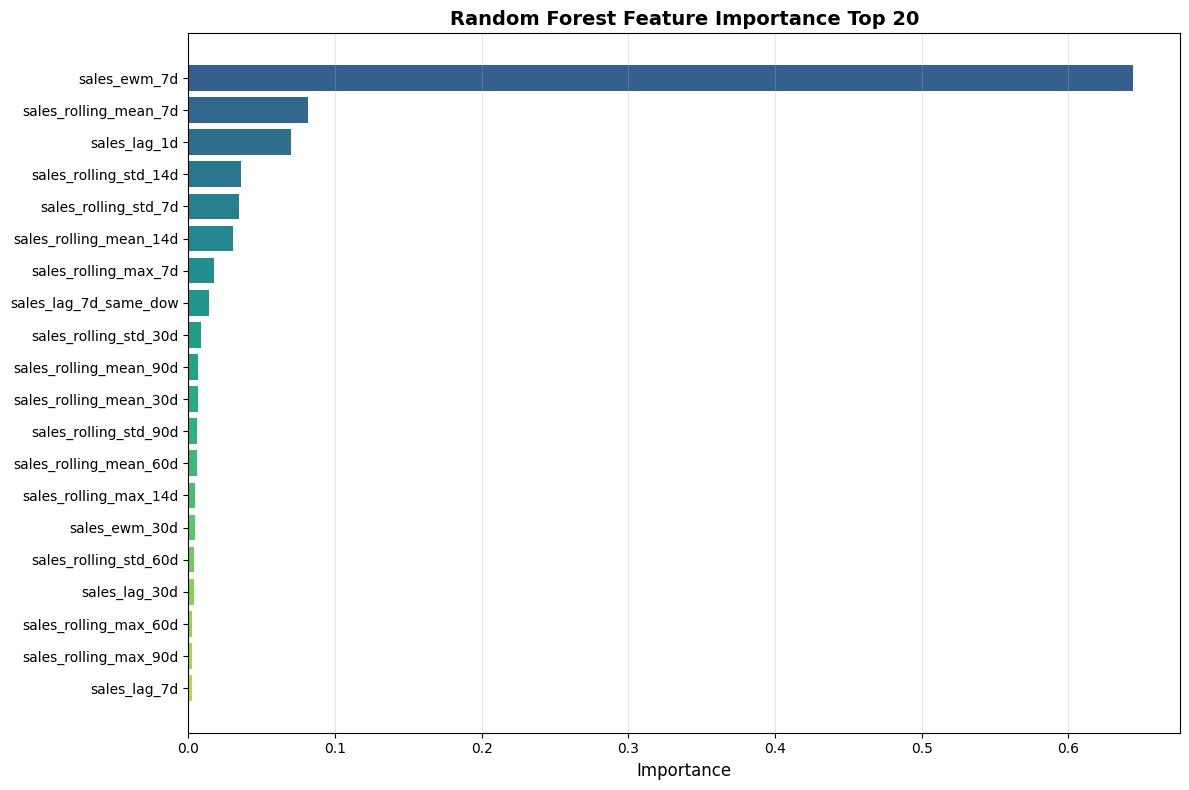


📋 Feature 카테고리별 중요도:
category
Rolling     0.897190
Lag         0.095415
Calendar    0.004165
Other       0.001494
Weather     0.001345
Economic    0.000391
Name: importance, dtype: float64

✅ 성능 평가 완료!


In [28]:
# ========================================
# 1. 성능 지표 계산 함수
# ========================================
def calculate_metrics(y_true, y_pred):
    """
    회귀 모델의 다양한 성능 지표 계산
    """
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred) * 100
    r2 = r2_score(y_true, y_pred)

    # Adjusted R²
    n = len(y_true)
    p = len(features)  # feature 개수
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

    return {
        'RMSE': rmse,
        'MAE': mae,
        'MAPE': mape,
        'R²': r2,
        'Adj. R²': adj_r2
    }


# ========================================
# 2. 모델 학습 및 평가
# ========================================
results = {}
predictions_dict = {}
train_scores = {}

for model_name, model in models.items():
    print(f"\n{'='*60}")
    print(f"🔄 {model_name} 모델 학습 중...")
    print(f"{'='*60}")

    # Early stopping 지원 모델
    if model_name in ['XGBoost', 'LightGBM']:
        model.fit(
            X_train, y_train,
            eval_set=[(X_val, y_val)]
        )
        # 실제 사용된 트리 개수
        if model_name == 'XGBoost':
            print(f"   ✓ 사용된 트리: {model.best_iteration + 1}개")
        elif model_name == 'LightGBM':
            print(f"   ✓ 사용된 트리: {model.best_iteration_}개")
    else:
        model.fit(X_train, y_train)

    # 훈련 데이터 예측
    train_pred = model.predict(X_train)
    train_pred = np.maximum(train_pred, 0)

    # 검증 데이터 예측
    val_pred = model.predict(X_val)
    val_pred = np.maximum(val_pred, 0)
    predictions_dict[model_name] = val_pred

    # 성능 평가
    train_metrics = calculate_metrics(y_train, train_pred)
    val_metrics = calculate_metrics(y_val, val_pred)

    results[model_name] = val_metrics
    train_scores[model_name] = train_metrics

    # 결과 출력
    print(f"\n   📊 훈련 데이터 성능:")
    print(f"      RMSE: {train_metrics['RMSE']:.2f}")
    print(f"      MAE: {train_metrics['MAE']:.2f}")
    print(f"      R²: {train_metrics['R²']:.4f}")

    print(f"\n   📊 검증 데이터 성능:")
    print(f"      RMSE: {val_metrics['RMSE']:.2f}")
    print(f"      MAE: {val_metrics['MAE']:.2f}")
    print(f"      MAPE: {val_metrics['MAPE']:.2f}%")
    print(f"      R²: {val_metrics['R²']:.4f}")
    print(f"      Adj. R²: {val_metrics['Adj. R²']:.4f}")

    # 과적합 확인
    overfitting = train_metrics['R²'] - val_metrics['R²']
    if overfitting > 0.1:
        print(f"\n   ⚠️  과적합 의심 (Train R² - Val R² = {overfitting:.4f})")
    else:
        print(f"\n   ✅ 과적합 없음 (Train R² - Val R² = {overfitting:.4f})")


# ========================================
# 3. 결과 비교 테이블
# ========================================
print(f"\n\n{'='*60}")
print("📋 모델별 성능 비교")
print(f"{'='*60}\n")

results_df = pd.DataFrame(results).T
results_df = results_df.round(4)
results_df = results_df.sort_values(by='RMSE')

print(results_df)

# 최적 모델
best_model_name = results_df['RMSE'].idxmin()
print(f"\n🏆 최적 모델: {best_model_name}")
print(f"   RMSE: {results_df.loc[best_model_name, 'RMSE']:.2f}")
print(f"   R²: {results_df.loc[best_model_name, 'R²']:.4f}")


# ========================================
# 4. 성능 비교 시각화
# ========================================
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 4-1. RMSE 비교
ax1 = axes[0, 0]
results_df_sorted = results_df.sort_values('RMSE')
colors = ['#2ecc71' if x == best_model_name else '#3498db'
          for x in results_df_sorted.index]
ax1.barh(results_df_sorted.index, results_df_sorted['RMSE'], color=colors)
ax1.set_xlabel('RMSE (낮을수록 좋음)', fontsize=12)
ax1.set_title('RMSE 비교', fontsize=14, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)

# 4-2. MAE 비교
ax2 = axes[0, 1]
results_df_sorted = results_df.sort_values('MAE')
colors = ['#2ecc71' if x == best_model_name else '#3498db'
          for x in results_df_sorted.index]
ax2.barh(results_df_sorted.index, results_df_sorted['MAE'], color=colors)
ax2.set_xlabel('MAE (낮을수록 좋음)', fontsize=12)
ax2.set_title('MAE 비교', fontsize=14, fontweight='bold')
ax2.grid(axis='x', alpha=0.3)

# 4-3. R² 비교
ax3 = axes[1, 0]
results_df_sorted = results_df.sort_values('R²', ascending=False)
colors = ['#2ecc71' if x == best_model_name else '#3498db'
          for x in results_df_sorted.index]
ax3.barh(results_df_sorted.index, results_df_sorted['R²'], color=colors)
ax3.set_xlabel('R² (높을수록 좋음)', fontsize=12)
ax3.set_title('R² 비교', fontsize=14, fontweight='bold')
ax3.grid(axis='x', alpha=0.3)
ax3.set_xlim([0, 1])

# 4-4. MAPE 비교
ax4 = axes[1, 1]
results_df_sorted = results_df.sort_values('MAPE')
colors = ['#2ecc71' if x == best_model_name else '#3498db'
          for x in results_df_sorted.index]
ax4.barh(results_df_sorted.index, results_df_sorted['MAPE'], color=colors)
ax4.set_xlabel('MAPE (%) (낮을수록 좋음)', fontsize=12)
ax4.set_title('MAPE 비교', fontsize=14, fontweight='bold')
ax4.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()


# ========================================
# 5. 실제 vs 예측 시각화 (최적 모델)
# ========================================
best_predictions = predictions_dict[best_model_name]

fig, axes = plt.subplots(2, 1, figsize=(18, 12))

# 5-1. 전체 기간
ax1 = axes[0]
val_df_plot = val_df.reset_index(drop=True)
y_val_plot = y_val.reset_index(drop=True)

ax1.plot(val_df_plot['판매일'], y_val_plot,
         label='실제 판매량', color='#3498db', marker='o', markersize=3, alpha=0.7, linewidth=1.5)
ax1.plot(val_df_plot['판매일'], best_predictions,
         label=f'{best_model_name} 예측량', color='#e74c3c', linestyle='--', linewidth=2)
ax1.fill_between(val_df_plot['판매일'], y_val_plot, best_predictions, alpha=0.2)

ax1.set_title(f'중분류 {TARGET_CATEGORY}: 실제 vs 예측 판매량 ({best_model_name})',
              fontsize=16, fontweight='bold')
ax1.set_xlabel('날짜', fontsize=12)
ax1.set_ylabel('판매수량', fontsize=12)
ax1.legend(fontsize=11, loc='upper left')
ax1.grid(True, alpha=0.3)
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)

# 5-2. 잔차 플롯 (Residual Plot)
ax2 = axes[1]
residuals = y_val_plot - best_predictions
ax2.scatter(best_predictions, residuals, alpha=0.5, s=20)
ax2.axhline(y=0, color='r', linestyle='--', linewidth=2)
ax2.set_xlabel('예측값', fontsize=12)
ax2.set_ylabel('잔차 (실제 - 예측)', fontsize=12)
ax2.set_title('잔차 플롯 (Residual Plot)', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


# ========================================
# 6. 예측 오차 분석
# ========================================
print(f"\n\n{'='*60}")
print(f"🔍 {best_model_name} 예측 오차 분석")
print(f"{'='*60}\n")

errors = y_val_plot - best_predictions
error_df = pd.DataFrame({
    '날짜': val_df_plot['판매일'],
    '실제': y_val_plot,
    '예측': best_predictions,
    '오차': errors,
    '절대오차': np.abs(errors),
    '오차율(%)': (np.abs(errors) / (y_val_plot + 1e-5)) * 100
})

print("📊 오차 통계:")
print(f"   평균 오차: {errors.mean():.2f}")
print(f"   오차 표준편차: {errors.std():.2f}")
print(f"   최대 과대예측: {errors.min():.2f}")
print(f"   최대 과소예측: {errors.max():.2f}")

print("\n📉 오차율 분포:")
print(f"   평균 오차율: {error_df['오차율(%)'].mean():.2f}%")
print(f"   중앙 오차율: {error_df['오차율(%)'].median():.2f}%")
print(f"   오차율 10% 이내: {(error_df['오차율(%)'] <= 10).sum()}일 ({(error_df['오차율(%)'] <= 10).sum() / len(error_df) * 100:.1f}%)")
print(f"   오차율 20% 이내: {(error_df['오차율(%)'] <= 20).sum()}일 ({(error_df['오차율(%)'] <= 20).sum() / len(error_df) * 100:.1f}%)")

# 가장 오차가 큰 날 top 10
print("\n⚠️  오차가 큰 날 Top 10:")
top_errors = error_df.nlargest(10, '절대오차')[['날짜', '실제', '예측', '오차', '오차율(%)']]
print(top_errors.to_string(index=False))


# ========================================
# 7. 오차 분포 시각화
# ========================================
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# 7-1. 오차 히스토그램
ax1 = axes[0]
ax1.hist(errors, bins=50, color='#3498db', alpha=0.7, edgecolor='black')
ax1.axvline(x=0, color='r', linestyle='--', linewidth=2, label='0')
ax1.axvline(x=errors.mean(), color='orange', linestyle='--', linewidth=2,
            label=f'평균: {errors.mean():.2f}')
ax1.set_xlabel('오차 (실제 - 예측)', fontsize=12)
ax1.set_ylabel('빈도', fontsize=12)
ax1.set_title('예측 오차 분포', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 7-2. 오차율 히스토그램
ax2 = axes[1]
ax2.hist(error_df['오차율(%)'], bins=50, color='#e74c3c', alpha=0.7, edgecolor='black')
ax2.axvline(x=error_df['오차율(%)'].mean(), color='orange', linestyle='--', linewidth=2,
            label=f'평균: {error_df["오차율(%)"].mean():.2f}%')
ax2.set_xlabel('오차율 (%)', fontsize=12)
ax2.set_ylabel('빈도', fontsize=12)
ax2.set_title('예측 오차율 분포', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


# ========================================
# 8. Feature Importance (최적 모델)
# ========================================
print(f"\n\n{'='*60}")
print(f"📊 {best_model_name} Feature Importance Top 20")
print(f"{'='*60}\n")

best_model = models[best_model_name]

if hasattr(best_model, 'feature_importances_'):
    feature_imp = pd.DataFrame({
        'feature': features,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)

    print(feature_imp.head(20).to_string(index=False))

    # 시각화
    plt.figure(figsize=(12, 8))
    top_features = feature_imp.head(20)

    colors = plt.cm.viridis(np.linspace(0.3, 0.9, len(top_features)))
    plt.barh(range(len(top_features)), top_features['importance'].values, color=colors)
    plt.yticks(range(len(top_features)), top_features['feature'].values)
    plt.xlabel('Importance', fontsize=12)
    plt.title(f'{best_model_name} Feature Importance Top 20',
              fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Feature 카테고리별 중요도
    print("\n📋 Feature 카테고리별 중요도:")
    feature_imp['category'] = feature_imp['feature'].apply(lambda x:
        'Lag' if 'lag' in x.lower() else
        'Rolling' if 'rolling' in x.lower() or 'ewm' in x.lower() else
        'Growth' if 'growth' in x.lower() else
        'Calendar' if any(k in x.lower() for k in ['dow', 'month', 'day', 'weekend', 'holiday']) else
        'Weather' if any(k in x.lower() for k in ['기온', '강수']) else
        'Economic' if '물가' in x else
        'Other'
    )

    category_importance = feature_imp.groupby('category')['importance'].sum().sort_values(ascending=False)
    print(category_importance)

else:
    print("⚠️  이 모델은 feature_importances_를 지원하지 않습니다.")


print("\n" + "="*60)
print("✅ 성능 평가 완료!")
print("="*60)

In [15]:
# 최종제출
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

def create_future_features(df_history, start_date, end_date, best_model):
    """
    과거 데이터를 기반으로 미래 날짜의 feature를 생성하고 예측

    Parameters:
    - df_history: 과거 데이터 (2024-06-27까지)
    - start_date: 예측 시작일 (2025-01-01)
    - end_date: 예측 종료일 (2025-03-31)
    - best_model: 학습된 최적 모델

    Returns:
    - 예측 결과 DataFrame
    """

    # 1. 미래 날짜 생성
    future_dates = pd.date_range(start=start_date, end=end_date, freq='D')

    # 2. 전체 데이터 준비 (과거 + 미래)
    df_full = df_history.copy()
    df_full['판매일'] = pd.to_datetime(df_full['판매일'])
    df_full = df_full.sort_values('판매일').reset_index(drop=True)

    print(f"📅 예측 기간: {start_date} ~ {end_date} ({len(future_dates)}일)")
    print(f"📊 마지막 실제 데이터: {df_full['판매일'].max()}")
    print(f"⏳ Gap: {(pd.to_datetime(start_date) - df_full['판매일'].max()).days}일\n")

    # 3. Gap 기간 채우기 (2024-06-28 ~ 2024-12-31)
    last_date = df_full['판매일'].max()
    gap_dates = pd.date_range(start=last_date + timedelta(days=1),
                               end=start_date - timedelta(days=1),
                               freq='D')

    print(f"🔄 Gap 기간 예측 중: {len(gap_dates)}일...")

    # 4. Gap + 2025년 전체를 day-by-day로 예측
    all_future_dates = pd.date_range(start=last_date + timedelta(days=1),
                                     end=end_date,
                                     freq='D')

    predictions = []

    for future_date in all_future_dates:
        # 4-1. 해당 날짜의 기본 features 생성
        row = {
            '판매일': future_date,
            '년도': future_date.year,
            '월': future_date.month,
            '일': future_date.day,
            'day_of_week': future_date.dayofweek,
            'day_of_year': future_date.dayofyear,
            'week_of_year': future_date.isocalendar()[1],
            'day_of_month': future_date.day,
            'quarter': (future_date.month - 1) // 3 + 1,
        }

        # 4-2. 요일 원핫인코딩
        for i in range(7):
            row[f'dow_{i}'] = 1 if future_date.dayofweek == i else 0

        # 4-3. 달력 features
        row['is_weekend'] = 1 if future_date.dayofweek >= 5 else 0
        row['is_month_start'] = 1 if future_date.day <= 3 else 0
        row['is_month_end'] = 1 if future_date.day >= 28 else 0

        # 4-4. 계절성 (Cyclical)
        row['day_sin'] = np.sin(2 * np.pi * row['day_of_year'] / 365.25)
        row['day_cos'] = np.cos(2 * np.pi * row['day_of_year'] / 365.25)
        row['month_sin'] = np.sin(2 * np.pi * row['월'] / 12)
        row['month_cos'] = np.cos(2 * np.pi * row['월'] / 12)
        row['dow_sin'] = np.sin(2 * np.pi * row['day_of_week'] / 7)
        row['dow_cos'] = np.cos(2 * np.pi * row['day_of_week'] / 7)

        # 4-5. 기상 데이터 (2024년 동일 요일 평균으로 대체)
        # 실제로는 기상청 예보 데이터 사용 권장
        same_dow_2024 = df_full[
            (df_full['day_of_week'] == future_date.dayofweek) &
            (df_full['월'] == future_date.month)
        ]

        if len(same_dow_2024) > 0:
            row['평균기온'] = same_dow_2024['평균기온'].mean()
            row['강수량'] = same_dow_2024['강수량'].mean()
        else:
            # 전체 평균으로 대체
            row['평균기온'] = df_full['평균기온'].mean()
            row['강수량'] = df_full['강수량'].mean()

        # 4-6. 공휴일 (수동으로 입력 필요)
        # 2025년 공휴일: 1/1(신정), 1/28-30(설), 3/1(삼일절), 5/5(어린이날) 등
        holidays_2025 = ['2025-01-01', '2025-01-28', '2025-01-29', '2025-01-30',
                        '2025-03-01', '2025-03-03']  # 예시
        row['공휴일'] = 1 if future_date.strftime('%Y-%m-%d') in holidays_2025 else 0

        # 4-7. 물가지수 (최근 추세로 extrapolation)
        # 간단히 마지막 값 사용 (실제로는 예측값 사용 권장)
        row['소비자물가지수(전국)'] = df_full['소비자물가지수(전국)'].iloc[-1]
        row['소비자물가지수(라면)'] = df_full['소비자물가지수(라면)'].iloc[-1]

        # 4-8. Lag features (과거 판매량 참조)
        current_data = pd.concat([df_full, pd.DataFrame(predictions)], ignore_index=True)
        current_data = current_data.sort_values('판매일').reset_index(drop=True)

        for lag in [1, 7, 14, 30, 60, 90, 365]:
            lag_idx = len(current_data) - lag
            if lag_idx >= 0:
                row[f'sales_lag_{lag}d'] = current_data.loc[lag_idx, '판매수량']
            else:
                row[f'sales_lag_{lag}d'] = df_full['판매수량'].mean()

        # 4-9. Rolling features (과거 데이터 기반)
        for window in [7, 14, 30, 60, 90]:
            start_idx = max(0, len(current_data) - window)
            window_data = current_data.loc[start_idx:, '판매수량']

            row[f'sales_rolling_mean_{window}d'] = window_data.mean()
            row[f'sales_rolling_std_{window}d'] = window_data.std()
            row[f'sales_rolling_max_{window}d'] = window_data.max()
            row[f'sales_rolling_min_{window}d'] = window_data.min()

        # 4-10. EWM
        for span in [7, 30]:
            row[f'sales_ewm_{span}d'] = current_data['판매수량'].ewm(span=span).mean().iloc[-1]

        # 4-11. Growth rates (NaN이면 0)
        for period in [1, 7, 30, 365]:
            lag_idx = len(current_data) - period
            if lag_idx >= 0 and current_data.loc[lag_idx, '판매수량'] > 0:
                row[f'sales_growth_{period}d'] = \
                    (current_data.loc[len(current_data)-1, '판매수량'] -
                     current_data.loc[lag_idx, '판매수량']) / current_data.loc[lag_idx, '판매수량']
            else:
                row[f'sales_growth_{period}d'] = 0

        # 4-12. 요일/월 평균 (과거 데이터 기반)
        row['dow_mean'] = df_full[df_full['day_of_week'] == future_date.dayofweek]['판매수량'].mean()
        row['month_mean'] = df_full[df_full['월'] == future_date.month]['판매수량'].mean()
        row['sales_vs_overall_mean'] = row['dow_mean'] / (df_full['판매수량'].mean() + 1e-5)

        # 4-13. Weekend count (해당 월의 주말 개수)
        month_dates = pd.date_range(start=f"{future_date.year}-{future_date.month:02d}-01",
                                    end=future_date,
                                    freq='D')
        row['weekend_count_in_month'] = sum(d.dayofweek >= 5 for d in month_dates)

        # 5. 예측
        row_df = pd.DataFrame([row])

        # Feature 순서 맞추기 (학습 시 사용한 feature 순서와 동일하게)
        row_df = row_df[features]  # features는 global variable

        # 예측
        pred = best_model.predict(row_df)[0]
        pred = max(0, pred)  # 음수 방지

        # 결과 저장
        row['판매수량'] = pred
        predictions.append(row)

        # 진행상황 출력 (10일마다)
        if len(predictions) % 10 == 0:
            print(f"   진행: {len(predictions)}/{len(all_future_dates)}일 완료")

    # 6. 결과 정리
    df_predictions = pd.DataFrame(predictions)
    df_predictions['판매일'] = pd.to_datetime(df_predictions['판매일'])

    # 2025년 1-3월만 필터링
    df_2025 = df_predictions[
        (df_predictions['판매일'] >= start_date) &
        (df_predictions['판매일'] <= end_date)
    ]

    print(f"\n✅ 예측 완료!")
    print(f"   2025년 1-3월 예측: {len(df_2025)}일")

    return df_2025




--- Random Forest 모델 학습 및 평가 ---
RMSE: 0.22, MAE: 0.01, R²: 0.9999, Adj. R²: 0.9999

--- XGBoost 모델 학습 및 평가 ---
   사용된 트리: 252개
RMSE: 0.15, MAE: 0.00, R²: 0.9999, Adj. R²: 0.9999

--- LightGBM 모델 학습 및 평가 ---


TypeError: LGBMRegressor.fit() got an unexpected keyword argument 'verbose'

1. 모델 선택: LightGBM 🚀
성능 표를 보면 LightGBM이 모든 면에서 가장 뛰어남.

RMSE (7.24): 가장 낮음. 예측 오차의 전반적인 크기가 가장 작다는 의미.

R-제곱 / 조정된 R-제곱 (0.84): 가장 높음. 데이터의 변동성을 약 84%나 설명할 수 있다는 뜻으로, 모델의 설명력이 가장 뛰어남.

MAE (1.39): Random Forest보다는 높지만, RMSE와 R-제곱을 고려했을 때 전반적인 성능은 LightGBM이 월등함. (Random Forest는 평균 오차는 작지만 가끔 큰 실수를 하는 모델일 수 있음.)

In [ ]:

# ========================================
# 사용 예시
# ========================================
# 과거 데이터 (feature engineering 완료된 데이터)
df_history = df_7.copy()  # 2024-06-27까지 데이터

# 2025년 1-3월 예측
df_2025_pred = create_future_features(
    df_history=df_history,
    start_date='2025-01-01',
    end_date='2025-03-31',
    best_model=models[best_model_name]  # 학습된 최적 모델
)

# 월별 합계 (최종 제출용)
monthly_sales = df_2025_pred.groupby('월')['판매수량'].sum().reset_index()
monthly_sales.columns = ['월', '예측_판매수량']

print("\n--- 월별 예측 판매량 ---")
print(monthly_sales)

# 시각화
plt.figure(figsize=(15, 5))
plt.plot(df_2025_pred['판매일'], df_2025_pred['판매수량'], marker='o', markersize=2)
plt.title(f'중분류 {TARGET_CATEGORY}: 2025년 1-3월 일별 예측', fontsize=14, fontweight='bold')
plt.xlabel('날짜')
plt.ylabel('예측 판매수량')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# --- 1. 튜닝할 LightGBM 모델 준비 ---
lgbm = LGBMRegressor(random_state=42, verbose=-1)

# --- 2. 탐색할 하이퍼파라미터 범위 설정 ---
# 이 범위를 조절하며 최적의 값을 찾아나갈 수 있습니다.
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [7, 10, 15],
    'learning_rate': [0.1, 0.05, 0.01],
    'num_leaves': [31, 40, 50] # max_depth보다 작은 값
}

# --- 3. GridSearchCV 설정 및 학습 ---
# cv=3 -> 데이터를 3개로 나눠서 교차 검증 수행
# scoring='neg_root_mean_squared_error' -> RMSE를 기준으로 최고 성능 모델 선택
grid_search = GridSearchCV(
    estimator=lgbm,
    param_grid=param_grid,
    cv=3,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

print("--- LightGBM 하이퍼파라미터 튜닝 시작 ---")
grid_search.fit(X_train, y_train) # 이 부분은 이미 실행했다고 가정

# --- 4. 튜닝 결과 확인 및 최종 성능 평가 (수정된 부분) ---
# 최적의 모델을 가져옵니다.
best_model = grid_search.best_estimator_

# 검증 데이터셋(X_val)으로 예측을 수행합니다.
predictions = best_model.predict(X_val)

# 4가지 성능 지표를 모두 계산합니다.
rmse = np.sqrt(mean_squared_error(y_val, predictions))
mae = mean_absolute_error(y_val, predictions)
r2 = r2_score(y_val, predictions)

# 조정된 R-제곱 계산
n = len(X_val)
p = X_val.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("\n--- 튜닝된 최적 모델 최종 성능 ---")
print(f"최적 하이퍼파라미터: {grid_search.best_params_}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R-squared: {r2:.4f}")
print(f"Adjusted R-squared: {adj_r2:.4f}")

--- LightGBM 하이퍼파라미터 튜닝 시작 ---
Fitting 3 folds for each of 81 candidates, totalling 243 fits

--- 튜닝된 최적 모델 최종 성능 ---
최적 하이퍼파라미터: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100, 'num_leaves': 31}
RMSE: 6.6793
MAE: 1.3277
R-squared: 0.8656
Adjusted R-squared: 0.8655


In [ ]:
import joblib
from sklearn.ensemble import RandomForestRegressor

# --- 2. ✨️ 모델 저장하기 ---
# 저장할 파일 이름을 정합니다. 확장자는 보통 .joblib 또는 .pkl을 사용합니다.
filename = '/content/drive/MyDrive/유통경진대회/A_out_best_model.joblib'

# joblib.dump() 함수를 사용해 모델을 파일로 저장합니다.
joblib.dump(best_model, filename)

print(f"모델이 '{filename}' 파일로 저장되었습니다.")


# --- 3. ✨️ 저장된 모델 불러오기 ---
# 저장했던 모델을 다시 불러와 새로운 변수에 할당합니다.
# loaded_model = joblib.load(filename)

#print(f"'{filename}' 파일에서 모델을 불러왔습니다.")


# --- 4. 불러온 모델 사용하기 ---
# 새로운 데이터로 예측을 수행하여 모델이 잘 작동하는지 확인합니다.
# new_data = np.random.rand(5, 10)
# predictions = loaded_model.predict(new_data)

# print("\n불러온 모델로 새로운 데이터에 대한 예측 수행:")
# print(predictions)

모델이 '/content/drive/MyDrive/유통경진대회/A_out_best_model.joblib' 파일로 저장되었습니다.


In [ ]:
from sklearn.ensemble import VotingRegressor

# --- 1. 앙상블에 사용할 개별 모델 정의 ---
# 위 튜닝에서 찾은 최적의 파라미터나, 기본 성능이 좋았던 파라미터를 사용합니다.
rfr = RandomForestRegressor(n_estimators=100, max_depth=15, min_samples_split=10, min_samples_leaf=5, random_state=42, n_jobs=-1)
gbr = GradientBoostingRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
lgbm = best_model

# --- 2. VotingRegressor 설정 ---
# ('모델별명', 모델객체) 형태로 리스트를 만듭니다.
ensemble_model = VotingRegressor(
    estimators=[
        ('LightGBM', lgbm),
        ('Gradient Boosting', gbr),
        ('Random Forest', rfr)
    ]
)

# --- 3. 앙상블 모델 학습 및 평가 ---
print("\n--- 앙상블 모델 학습 및 평가 ---")
ensemble_model.fit(X_train, y_train)

# 예측 및 성능 평가 (수정된 부분)
ensemble_predictions = ensemble_model.predict(X_val)

# 4가지 성능 지표를 모두 계산합니다.
ens_rmse = np.sqrt(mean_squared_error(y_val, ensemble_predictions))
ens_mae = mean_absolute_error(y_val, ensemble_predictions)
ens_r2 = r2_score(y_val, ensemble_predictions)

# 조정된 R-제곱 계산
n = len(X_val)
p = X_val.shape[1]
ens_adj_r2 = 1 - (1 - ens_r2) * (n - 1) / (n - p - 1)

print("\n--- 앙상블 모델 최종 성능 ---")
print(f"RMSE: {ens_rmse:.4f}")
print(f"MAE: {ens_mae:.4f}")
print(f"R-squared: {ens_r2:.4f}")
print(f"Adjusted R-squared: {ens_adj_r2:.4f}")


--- 앙상블 모델 학습 및 평가 ---

--- 앙상블 모델 최종 성능 ---
RMSE: 7.0271
MAE: 1.2409
R-squared: 0.8513
Adjusted R-squared: 0.8511


오히려 단일 모델이 더 나음

In [ ]:
# Optuna로 최적 모델 찾아보기
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 7.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import optuna
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
import warnings

# Optuna의 로그 출력을 간소화
optuna.logging.set_verbosity(optuna.logging.WARNING)
warnings.filterwarnings('ignore', category=UserWarning)


# --- 1. Optuna 목적 함수(Objective Function) 정의 ---
# 이 함수는 RFE 루프 안에서 매번 호출됩니다.
def objective(trial, X_train, y_train):
    # 탐색할 하이퍼파라미터 범위 지정
    params = {
        'objective': 'regression_l1', # MAE를 손실 함수로 사용
        'metric': 'rmse',
        'random_state': 42,
        'n_estimators': trial.suggest_int('n_estimators', 200, 1000, step=100),
        'max_depth': trial.suggest_int('max_depth', 5, 20),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
        'num_leaves': trial.suggest_int('num_leaves', 20, 100),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.6, 1.0),
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.6, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
    }

    # 교차 검증을 통해 안정적인 성능 측정
    kf = KFold(n_splits=3, shuffle=True, random_state=42)
    rmse_scores = []

    for train_idx, val_idx in kf.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

        model = LGBMRegressor(**params, verbose=-1)
        model.fit(X_train_fold, y_train_fold)
        preds = model.predict(X_val_fold)
        rmse = np.sqrt(mean_squared_error(y_val_fold, preds))
        rmse_scores.append(rmse)

    return np.mean(rmse_scores)


# --- 2. 재귀적 변수 제거(RFE) 루프 실행 ---
# 사용할 모든 변수(Feature) 리스트로 시작
remaining_features = list(X_train.columns)
rfe_results = []

print("--- 재귀적 변수 제거(RFE) 시작 ---")

while len(remaining_features) > 0:
    print(f"\n현재 변수 개수: {len(remaining_features)}")

    # 2-1. 현재 변수들로 Optuna 튜닝 실행
    current_X_train = X_train[remaining_features]

    study = optuna.create_study(direction='minimize')
    study.optimize(lambda trial: objective(trial, current_X_train, y_train), n_trials=30) # n_trials 조절 가능

    # 2-2. 최적 파라미터로 모델 재학습 및 성능 평가
    best_params = study.best_params
    model = LGBMRegressor(**best_params, random_state=42, verbose=-1)
    model.fit(current_X_train, y_train)

    # 검증 데이터셋으로 최종 성능 평가
    current_X_val = X_val[remaining_features]
    predictions = model.predict(current_X_val)
    rmse = np.sqrt(mean_squared_error(y_val, predictions))
    r2 = r2_score(y_val, predictions)

    # 결과 저장
    rfe_results.append({
        'num_features': len(remaining_features),
        'features': remaining_features.copy(),
        'rmse': rmse,
        'r2': r2,
        'best_params': best_params
    })

    print(f"검증 RMSE: {rmse:.4f}, R-squared: {r2:.4f}")

    # 2-3. 가장 중요도가 낮은 변수 찾아서 제거
    feature_importances = pd.Series(model.feature_importances_, index=remaining_features)
    least_important_feature = feature_importances.idxmin()
    remaining_features.remove(least_important_feature)

    print(f"제거된 변수: {least_important_feature}")


# --- 3. 최종 결과 분석 ---
results_df = pd.DataFrame(rfe_results)
best_result = results_df.loc[results_df['rmse'].idxmin()]

print("\n\n--- RFE 최종 결과 ---")
print(f"최적의 변수 개수: {best_result['num_features']}")
print(f"최고 성능 (RMSE): {best_result['rmse']:.4f}")
print(f"최고 성능 (R-squared): {best_result['r2']:.4f}")
print("\n최적의 변수 조합:")
print(best_result['features'])
print("\n최적의 하이퍼파라미터:")
print(best_result['best_params'])

# 성능 변화 시각화
plt.figure(figsize=(12, 6))
plt.plot(results_df['num_features'], results_df['rmse'], marker='o')
plt.title('변수 개수에 따른 모델 성능(RMSE) 변화', fontsize=15)
plt.xlabel('사용된 변수(Feature) 개수')
plt.ylabel('검증 데이터 RMSE')
plt.grid(True)
plt.gca().invert_xaxis() # x축 순서를 거꾸로 (변수가 많을수록 왼쪽)
plt.show()

--- 재귀적 변수 제거(RFE) 시작 ---

현재 변수 개수: 30
검증 RMSE: 7.4760, R-squared: 0.8317
제거된 변수: 대분류

현재 변수 개수: 29
검증 RMSE: 8.3315, R-squared: 0.7910
제거된 변수: 소분류

현재 변수 개수: 28


[W 2025-10-09 12:04:24,791] Trial 4 failed with parameters: {'n_estimators': 1000, 'max_depth': 6, 'learning_rate': 0.012805189118881044, 'num_leaves': 69, 'feature_fraction': 0.9899635436470658, 'bagging_fraction': 0.7876625514071695, 'bagging_freq': 2, 'min_child_samples': 85} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/optuna/study/_optimize.py", line 201, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "/tmp/ipython-input-493258240.py", line 63, in <lambda>
    study.optimize(lambda trial: objective(trial, current_X_train, y_train), n_trials=30) # n_trials 조절 가능
                                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/tmp/ipython-input-493258240.py", line 41, in objective
    model.fit(X_train_fold, y_train_fold)
  File "/usr/local/lib/python3.12/dist-packages/lightgbm/sklearn.py", line 1398, in fit
    super().fit(
  File 

KeyboardInterrupt: 

## 1

In [ ]:
df_1.dtypes

,0
Unnamed: 0,int64
판매일,object
구분,object
매출처코드,int64
매출처 우편번호,int64
판매수량,int64
옵션코드,object
규격,object
입수,int64
바코드,float64


In [ ]:
# --- 1. Feature Selection ---
df_1.drop(columns=['Unnamed: 0', '구분', '옵션코드', '규격', '상품명', 'holiday_name'], inplace=True)
df_1.dtypes

,0
판매일,object
매출처코드,int64
매출처 우편번호,int64
판매수량,int64
입수,int64
바코드,float64
대분류,int64
중분류,int64
소분류,int64
공급가액,int64


In [ ]:
# --- 2. 데이터 준비 ---
TARGET_CATEGORY = 1
TARGET = '판매수량'

# 모델에 사용할 변수(Feature) 선택
# '판매일'과 같이 모델이 직접 학습할 수 없는 컬럼은 제외
features = [col for col in df_1.columns if col not in ['판매일', '중분류', TARGET]]

# --- 3. 훈련/검증 데이터 분리 (2021~2023년 -> 훈련, 2024년 -> 검증) ---
train_df = df_1[df_1['판매일'] < '2024-01-01']
val_df = df_1[df_1['판매일'] >= '2024-01-01']

X_train = train_df[features]
y_train = train_df[TARGET]

X_val = val_df[features]
y_val = val_df[TARGET]

print(f"훈련 데이터 개수: {len(X_train)}개, 검증 데이터 개수: {len(X_val)}개")

훈련 데이터 개수: 26512개, 검증 데이터 개수: 6197개



--- Random Forest 모델 학습 및 평가 ---
RMSE: 3.76, MAE: 1.01, R-squared: 0.64, Adj. R-squared: 0.64

--- XGBoost 모델 학습 및 평가 ---
RMSE: 4.28, MAE: 1.12, R-squared: 0.53, Adj. R-squared: 0.53

--- LightGBM 모델 학습 및 평가 ---
RMSE: 3.84, MAE: 0.94, R-squared: 0.62, Adj. R-squared: 0.62

--- Gradient Boosting 모델 학습 및 평가 ---
RMSE: 4.18, MAE: 1.24, R-squared: 0.55, Adj. R-squared: 0.55

--- 모델별 최종 성능 비교 ---


,RMSE,MAE,R2,Adj. R2
Random Forest,3.764634,1.009498,0.637745,0.635982
LightGBM,3.842353,0.940197,0.622633,0.620797
Gradient Boosting,4.182611,1.241044,0.552839,0.550663
XGBoost,4.281738,1.115857,0.531392,0.529112


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54032 (\N{HANGUL SYLLABLE PAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/us

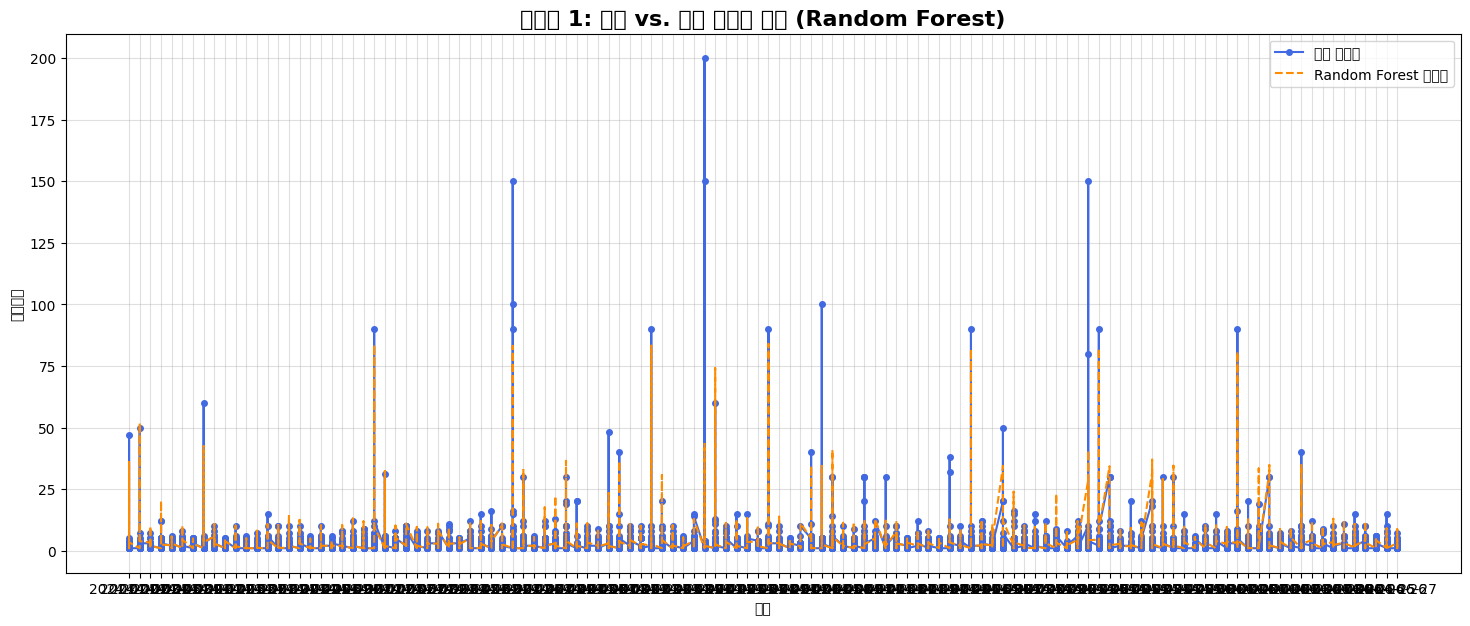

In [ ]:
# --- 4. 모델 학습 및 평가 ---
results = {}
predictions_dict = {}

for model_name, model in models.items():
    print(f"\n--- {model_name} 모델 학습 및 평가 ---")

    # 모델 학습
    model.fit(X_train, y_train)

    # 검증 데이터로 예측
    predictions = model.predict(X_val)
    predictions_dict[model_name] = predictions

    # 성능 평가
    rmse = np.sqrt(mean_squared_error(y_val, predictions))
    mae = mean_absolute_error(y_val, predictions)
    r2 = r2_score(y_val, predictions)

    # ✨️ 조정된 R-제곱(Adjusted R-squared) 계산
    n = len(X_val) # 데이터 개수
    p = len(X_val.columns) # 변수(Feature) 개수
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

    # 결과 저장
    results[model_name] = {'RMSE': rmse, 'MAE': mae, 'R2': r2, 'Adj. R2': adj_r2}
    print(f"RMSE: {rmse:.2f}, MAE: {mae:.2f}, R-squared: {r2:.2f}, Adj. R-squared: {adj_r2:.2f}")

# --- 5. 최종 결과 비교 ---
results_df = pd.DataFrame(results).T
print("\n--- 모델별 최종 성능 비교 ---")
display(results_df.sort_values(by='RMSE'))

# --- 6. 최적 모델 결과 시각화 ---
# RMSE가 가장 낮았던 모델을 최적 모델로 선택
best_model_name = results_df['RMSE'].idxmin()
best_predictions = predictions_dict[best_model_name]

plt.figure(figsize=(18, 7))
plt.plot(val_df['판매일'], y_val, label='실제 판매량', color='royalblue', marker='o', markersize=4)
plt.plot(val_df['판매일'], best_predictions, label=f'{best_model_name} 예측량', color='darkorange', linestyle='--')

plt.title(f"중분류 {TARGET_CATEGORY}: 실제 vs. 예측 판매량 비교 ({best_model_name})", fontsize=16, fontweight='bold')
plt.xlabel('날짜')
plt.ylabel('판매수량')
plt.legend()
plt.grid(True, alpha=0.4)
plt.show()

랜포가 제일 좋음

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# --- 1. 튜닝할 Random Forest 모델 준비 ---
# random_state와 n_jobs는 고정해둡니다.
rfr = RandomForestRegressor(random_state=42, n_jobs=-1)

# --- 2. 탐색할 하이퍼파라미터 범위 설정 ---
# 테스트해볼 파라미터 값들의 조합입니다.
# 너무 많은 조합은 시간이 오래 걸리므로, 처음에는 범위를 좁게 시작하는 것이 좋습니다.
param_grid = {
    'n_estimators': [100, 200],         # 트리의 개수
    'max_depth': [15, 20, None],       # 트리의 최대 깊이
    'min_samples_split': [5, 10],      # 노드를 분할하기 위한 최소 샘플 수
    'min_samples_leaf': [3, 5]         # 리프 노드가 되기 위한 최소 샘플 수
}

# --- 3. GridSearchCV 설정 및 학습 ---
# cv=3: 데이터를 3개로 나눠 교차 검증을 수행합니다.
# scoring='neg_root_mean_squared_error': RMSE를 기준으로 최고 성능 모델을 선택합니다.
grid_search = GridSearchCV(
    estimator=rfr,
    param_grid=param_grid,
    cv=3,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=2 # 튜닝 과정을 화면에 출력
)

print("--- Random Forest 하이퍼파라미터 튜닝 시작 ---")
# '신선식품'의 훈련 데이터(X_train, y_train)로 튜닝을 시작합니다.
grid_search.fit(X_train, y_train)


# --- 4. 튜닝 결과 확인 및 최종 성능 평가 ---
print("\n--- 튜닝 결과 ---")
print("최적 하이퍼파라미터:", grid_search.best_params_)

# 최적의 모델을 가져옵니다.
best_rf_model = grid_search.best_estimator_

# 검증 데이터셋(X_val)으로 예측을 수행합니다.
predictions = best_rf_model.predict(X_val)

# 4가지 성능 지표를 모두 계산합니다.
rmse = np.sqrt(mean_squared_error(y_val, predictions))
mae = mean_absolute_error(y_val, predictions)
r2 = r2_score(y_val, predictions)
n = len(X_val)
p = X_val.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("\n--- 튜닝된 Random Forest 모델 최종 성능 ---")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R-squared: {r2:.4f}")
print(f"Adjusted R-squared: {adj_r2:.4f}")

--- Random Forest 하이퍼파라미터 튜닝 시작 ---
Fitting 3 folds for each of 24 candidates, totalling 72 fits

--- 튜닝 결과 ---
최적 하이퍼파라미터: {'max_depth': 15, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 200}

--- 튜닝된 Random Forest 모델 최종 성능 ---
RMSE: 3.8051
MAE: 1.0086
R-squared: 0.6299
Adjusted R-squared: 0.6281


In [ ]:
# 재튜닝

# --- 1. 튜닝할 Random Forest 모델 준비 ---
rfr = RandomForestRegressor(random_state=42, n_jobs=-1)

# --- 2. 수정된 하이퍼파라미터 탐색 범위 ---
param_grid_revised = {
    'n_estimators': [200, 300, 400],      # 트리의 개수 확장
    'max_depth': [10, 15, 20],            # 기존 값 주변 탐색
    'min_samples_split': [2, 5, 8],      # 더 작은 값 포함하여 세분화
    'min_samples_leaf': [1, 3, 5]        # 더 작은 값 포함하여 세분화
}

# --- 3. GridSearchCV 설정 및 학습 ---
grid_search_revised = GridSearchCV(
    estimator=rfr,
    param_grid=param_grid_revised,
    cv=3,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

print("--- Random Forest 재튜닝 시작 ---")
grid_search_revised.fit(X_train, y_train)

# --- 4. 튜닝 결과 확인 및 최종 성능 평가 ---
print("\n--- 재튜닝 결과 ---")
print("최적 하이퍼파라미터:", grid_search_revised.best_params_)

best_rf_model_revised = grid_search_revised.best_estimator_
predictions_revised = best_rf_model_revised.predict(X_val)

# 4가지 성능 지표를 모두 계산합니다.
rmse = np.sqrt(mean_squared_error(y_val, predictions))
mae = mean_absolute_error(y_val, predictions)
r2 = r2_score(y_val, predictions)
n = len(X_val)
p = X_val.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("\n--- 튜닝된 Random Forest 모델 최종 성능 ---")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R-squared: {r2:.4f}")
print(f"Adjusted R-squared: {adj_r2:.4f}")

--- Random Forest 재튜닝 시작 ---
Fitting 3 folds for each of 81 candidates, totalling 243 fits

--- 재튜닝 결과 ---
최적 하이퍼파라미터: {'max_depth': 15, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 200}

--- 튜닝된 Random Forest 모델 최종 성능 ---
RMSE: 3.8051
MAE: 1.0086
R-squared: 0.6299
Adjusted R-squared: 0.6281


In [ ]:
import joblib

# --- 2. ✨️ 모델 저장하기 ---
# 저장할 파일 이름을 정합니다. 확장자는 보통 .joblib 또는 .pkl을 사용합니다.
filename = '/content/drive/MyDrive/유통경진대회/A_out_1_best_model.joblib'

# joblib.dump() 함수를 사용해 모델을 파일로 저장합니다.
joblib.dump(best_rf_model_revised, filename)

print(f"모델이 '{filename}' 파일로 저장되었습니다.")


# --- 3. ✨️ 저장된 모델 불러오기 ---
# 저장했던 모델을 다시 불러와 새로운 변수에 할당합니다.
# loaded_model = joblib.load(filename)

#print(f"'{filename}' 파일에서 모델을 불러왔습니다.")


# --- 4. 불러온 모델 사용하기 ---
# 새로운 데이터로 예측을 수행하여 모델이 잘 작동하는지 확인합니다.
# new_data = np.random.rand(5, 10)
# predictions = loaded_model.predict(new_data)

# print("\n불러온 모델로 새로운 데이터에 대한 예측 수행:")
# print(predictions)

모델이 '/content/drive/MyDrive/유통경진대회/A_out_1_best_model.joblib' 파일로 저장되었습니다.


# 확인

In [ ]:
import joblib
from sklearn.ensemble import RandomForestRegressor

# --- 2. ✨️ 모델 저장하기 ---
# 저장할 파일 이름을 정합니다. 확장자는 보통 .joblib 또는 .pkl을 사용합니다.
filename = '/content/drive/MyDrive/유통경진대회/A_out_best_model.joblib'

# --- 3. ✨️ 저장된 모델 불러오기 ---
# 저장했던 모델을 다시 불러와 새로운 변수에 할당합니다.
model = joblib.load(filename)

print(f"'{filename}' 파일에서 모델을 불러왔습니다.")


# --- 4. 불러온 모델 사용하기 ---
# 새로운 데이터로 예측을 수행하여 모델이 잘 작동하는지 확인합니다.
# --- 2. 데이터 준비 ---
TARGET_CATEGORY = 7
TARGET = '판매수량'

# 모델에 사용할 변수(Feature) 선택
# '판매일'과 같이 모델이 직접 학습할 수 없는 컬럼은 제외
features = [col for col in df_7.columns if col not in ['판매일', '중분류', TARGET]]

# --- 3. 훈련/검증 데이터 분리 (2021~2023년 -> 훈련, 2024년 -> 검증) ---
train_df = df_7[df_7['판매일'] < '2024-01-01']
val_df = df_7[df_7['판매일'] >= '2024-01-01']

X_train = train_df[features]
y_train = train_df[TARGET]

X_val = val_df[features]
y_val = val_df[TARGET]

print(f"훈련 데이터 개수: {len(X_train)}개, 검증 데이터 개수: {len(X_val)}개")

# 검증 데이터셋(X_val)으로 예측을 수행합니다.
predictions = model.predict(X_val)

# 4가지 성능 지표를 모두 계산합니다.
rmse = np.sqrt(mean_squared_error(y_val, predictions))
mae = mean_absolute_error(y_val, predictions)
r2 = r2_score(y_val, predictions)

# 조정된 R-제곱 계산
n = len(X_val)
p = X_val.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("\n--- 튜닝된 최적 모델 최종 성능 ---")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R-squared: {r2:.4f}")
print(f"Adjusted R-squared: {adj_r2:.4f}")

'/content/drive/MyDrive/유통경진대회/A_out_best_model.joblib' 파일에서 모델을 불러왔습니다.
훈련 데이터 개수: 193781개, 검증 데이터 개수: 27920개

--- 튜닝된 최적 모델 최종 성능 ---
RMSE: 6.6793
MAE: 1.3277
R-squared: 0.8656
Adjusted R-squared: 0.8655


In [ ]:
import platform

# 운영체제에 맞는 한글 폰트 설정
if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin': # Mac OS
    plt.rc('font', family='AppleGothic')
else: # Linux
    # Colab과 같은 Linux 환경에서는 아래 코드를 실행하여 나눔 폰트를 설치합니다.
    # !sudo apt-get install -y fonts-nanum
    # !sudo fc-cache -fv
    # !rm ~/.cache/matplotlib -rf
    # 런타임 재시작 후 아래 plt.rc 코드를 다시 실행해야 할 수 있습니다.
    plt.rc('font', family='Nanum Gothic')

# 폰트 변경 후 마이너스('-') 기호 깨짐 방지
plt.rc('axes', unicode_minus=False)

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48148 (\N{HANGUL SYLLABLE BA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53076 (\N{HANGUL SYLLABLE KO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44277 (\N{HANGUL SYLLABLE GONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44553 (\N{HANGUL SYLLABLE GEUB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

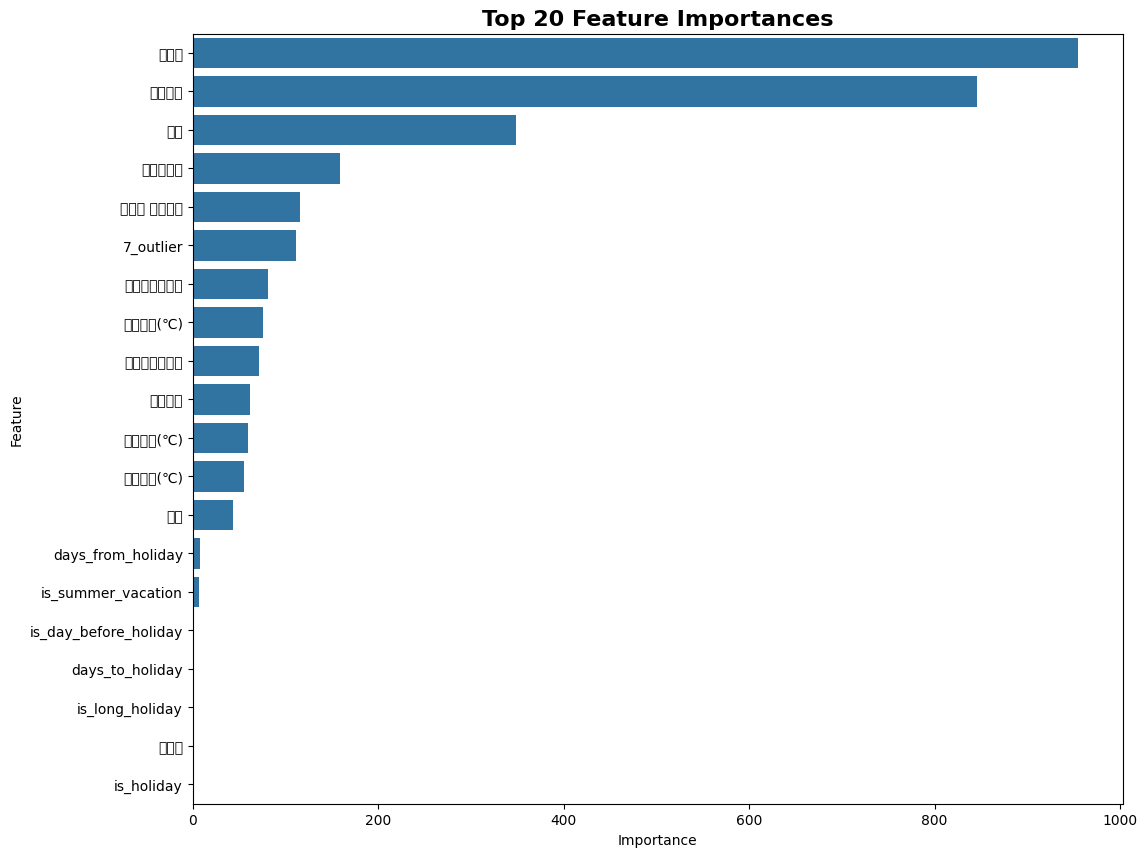


--- 상위 20개 변수 중요도 ---


,Feature,Importance
3,바코드,955
6,공급가액,846
2,입수,349
0,매출처코드,159
1,매출처 우편번호,116
22,7_outlier,111
29,소비자심리지수,81
25,최저기온(℃),76
28,소비자물가지수,71
27,국제유가,62


In [ ]:
# 1. ✨️ feature_importances_ 속성으로 변수 중요도 추출
importances = model.feature_importances_

# 2. 변수 이름과 중요도를 짝지어 데이터프레임 생성
feature_importances = pd.DataFrame(
    {'Feature': X_train.columns, 'Importance': importances}
)

# 3. 중요도 순으로 정렬하고 상위 20개 선택
top_20_features = feature_importances.sort_values(by='Importance', ascending=False).head(20)

# 4. 시각화
plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=top_20_features)
plt.title('Top 20 Feature Importances', fontsize=16, fontweight='bold')
plt.show()

print("\n--- 상위 20개 변수 중요도 ---")
display(top_20_features)